In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Load the Boston dataset
# Loading and Preprocessing the Dataset
boston_data_path = 'boston_house_prices.csv'
boston_data = pd.read_csv(boston_data_path, header=1)
min_max_scaler = MinMaxScaler()
boston_data_normalized = pd.DataFrame(min_max_scaler.fit_transform(boston_data), columns=boston_data.columns)
X = boston_data_normalized.drop('MEDV', axis=1)
y = boston_data_normalized['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
class SimpleNeuralNetworkAdjusted:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases with smaller initial values
        self.weights_input_to_hidden = np.random.randn(input_size, hidden_size) * 0.01
        self.bias_hidden = np.zeros(hidden_size)
        self.weights_hidden_to_output = np.random.randn(hidden_size, output_size) * 0.01
        self.bias_output = np.zeros(output_size)
        self.losses = []  # Store training loss at each epoch

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0) * 1

    def forward_pass(self, x):
        # Hidden layer
        hidden_layer_input = np.dot(x, self.weights_input_to_hidden) + self.bias_hidden
        hidden_layer_output = self.relu(hidden_layer_input)

        # Output layer (Linear)
        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_to_output) + self.bias_output
        output = output_layer_input
        return output, hidden_layer_output

    def backward_pass(self, x, y, output, hidden_output, learning_rate):
        # Calculate error
        error = output - y

        # Calculate gradients for output layer (linear)
        d_weights_hidden_to_output = np.dot(hidden_output.T, error)
        d_bias_output = np.sum(error, axis=0)

        # Calculate gradients for hidden layer (ReLU)
        d_hidden_layer = np.dot(error, self.weights_hidden_to_output.T) * self.relu_derivative(hidden_output)
        d_weights_input_to_hidden = np.dot(x.T, d_hidden_layer)
        d_bias_hidden = np.sum(d_hidden_layer, axis=0)

        # Update weights and biases
        self.weights_hidden_to_output -= learning_rate * d_weights_hidden_to_output
        self.bias_output -= learning_rate * d_bias_output
        self.weights_input_to_hidden -= learning_rate * d_weights_input_to_hidden
        self.bias_hidden -= learning_rate * d_bias_hidden

    def predict(self, x):
        output, _ = self.forward_pass(x)
        return output

    def train(self, x, y, learning_rate, epochs):
        for epoch in range(epochs):
            output, hidden_output = self.forward_pass(x)
            self.backward_pass(x, y, output, hidden_output, learning_rate)

            # Calculate and store the loss
            loss = np.mean((output - y) ** 2)
            self.losses.append(loss)

            # Printing the loss periodically
            if epoch % (epochs // 10) == 0 or epoch == epochs - 1:
                print(f"Epoch {epoch}, Loss: {loss}")

    def loss_epochs(self):
        return np.array(self.losses)

# Assuming SimpleNeuralNetworkAdjusted takes input_size as the number of features
nn_boston = SimpleNeuralNetworkAdjusted(input_size=X_train.shape[1], hidden_size=10, output_size=1)

# Train the neural network
nn_boston.train(X_train, y_train.values.reshape(-1, 1), learning_rate=0.001, epochs=100)

# Make predictions
nn_predictions = nn_boston.predict(X_test).flatten()


Epoch 0, Loss: 0.19922842872741317
Epoch 10, Loss: 0.04283501460723789
Epoch 20, Loss: 0.042731143565591136
Epoch 30, Loss: 0.0425909626421759
Epoch 40, Loss: 0.042373360935610234
Epoch 50, Loss: 0.042058615933667
Epoch 60, Loss: 0.0415739652519289
Epoch 70, Loss: 0.040827148771045756
Epoch 80, Loss: 0.0397050138571619
Epoch 90, Loss: 0.0380892184356618
Epoch 99, Loss: 0.03615388984411279


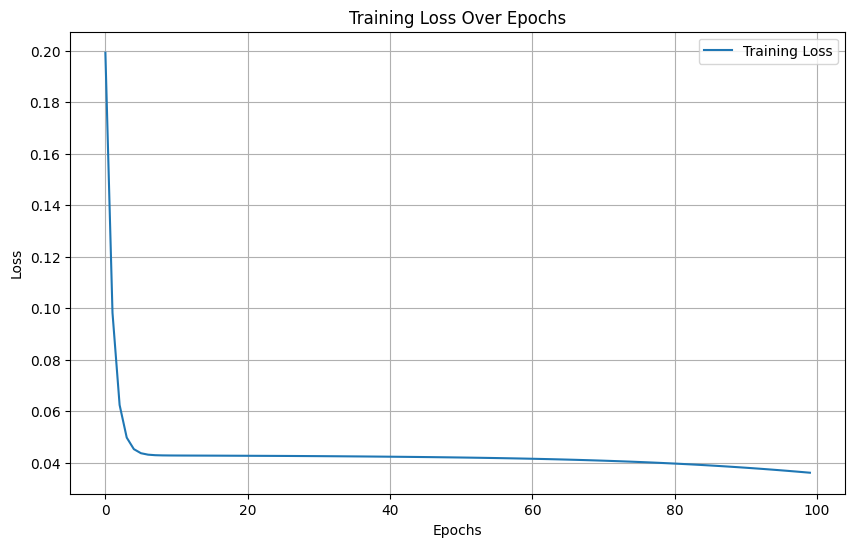

In [7]:
# Visualization of Training Loss Over Epochs
train_loss_epochs = nn_boston.loss_epochs()
plt.figure(figsize=(10, 6))
plt.plot(train_loss_epochs, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
def mean_absolute_percentage_error(y_true, y_pred):
    # Avoid division by zero
    mask = y_true != 0
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [9]:
# Make predictions
nn_predictions = nn_boston.predict(X_test).flatten()

# Evaluate the neural network
nn_mse = mean_squared_error(y_test.values, nn_predictions)
nn_r2 = r2_score(y_test.values, nn_predictions)
nn_mape = mean_absolute_percentage_error(y_test.values, nn_predictions)
# mape_boston = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Squared Error:", nn_mse)
print("R^2 Score:", nn_r2)
print("Mean Absolute Percentage Error:", nn_mape)

Mean Squared Error: 0.03018107373256991
R^2 Score: 0.16659591698903242
Mean Absolute Percentage Error: 53.28404667952194


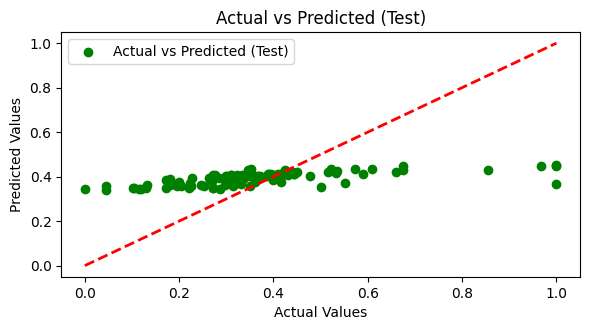

In [10]:
# Scatter Plots for Actual vs Predicted Values
plt.figure(figsize=(6, 6))

# Scatter plot for Test Set
plt.subplot(2, 1, 2)
plt.scatter(y_test, nn_predictions, color='green', label='Actual vs Predicted (Test)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted (Test)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()
